In [8]:
import numpy as np
import bokeh.layouts as bkl
import bokeh.plotting as bk
import bokeh.transform as btr
from bokeh.models import *
from bokeh.palettes import *
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

Let the current fraction of the population which is sick be $x_0$.  To simplify things, suppose that everybody has the same transmission probability.  You’ll often see this talked about as $R_0$, or the number of people who every sick person will infect by the time they recover.  Thus, the fraction of the infected population next week will be $R_0 * x$, and after $n$ iterations, $x_n = {R_0}^n * x_0$.  If $R_0 < 1$, then eventually the virus must die out.  If $R_0 > 1$, it increases exponentially. 

That’s actually only a valid approximation for small x; let’s see if we can make a slightly better approximation which can work even when much of the population is sick at the same time.  Instead, we’re going to assume that you can only transmit the virus to people who are not currently sick.  Thus,
 
$x_{k+1} = R_0 * x_k * (1 – x_k)$.
 
Mathematically, this is valid for $0 \leq R_0 \leq 4$, since the maximum possible value of $x(1-x)$ is $¼$ (at $x = ½$). 

In [9]:
def plot(Rmin,Rmax,n_range=25):
    n = [n for n in range(0, n_range)]
    x = np.zeros(len(n))

    source = ColumnDataSource(data=dict(n=n, x=x))

    plot = figure(width=400, height=400, x_range=(0, n_range), y_range=(0, 1))

    plot.line('n', 'x', source=source, line_width=3, line_alpha=0.6)

    Rslider = Slider(start=Rmin, end=Rmax, value=Rmin, step=.001, title="R_0")
    x0slider = Slider(start=0, end=1, value=0, step=.001, title="x_0")

    callback = CustomJS(args=dict(source=source, Rslider=Rslider,x0slider=x0slider), code="""
        const R = Rslider.value
        const x0 = x0slider.value
        const n = source.data.n
        let x = Array(n.length).fill(0)
        x[0] = x0
        for (var i = 1; i < n.length+1; i++) {
            x[i] = R*x[i-1]*(1-x[i-1])
        }

        source.data = { n, x }
    """)

    Rslider.js_on_change('value', callback)
    x0slider.js_on_change('value', callback)

    layout = bkl.column(Rslider, x0slider, plot)

    output_notebook()
    show(layout)

$R_0 < 1$.  Write some code in your favorite programming language to take an initial, random value of $x_0$ and then plot $x_n$ and see what happens over time.  What is the long-term behavior if $R_0 < 1$?  Does it match what you expected from before?

In [10]:
plot(0,1)

Loading BokehJS ...

$R_0 = 2$ and $R_0 = 2.5$.  Use the same code, but now try some values of $R_0 > 1$.  Now what happens? 

In [11]:
plot(1,2.5)

Loading BokehJS ...

Show that this behavior should only work for $1 < R_0 < 3$.  If you’ve got a bit of calculus, you’ll have some good tools to prove your answer, but otherwise, try values of $R_0$ in that range and see if you can figure out what’s going on.

It turns out this new behavior also doesn’t work all the way up to $R_0 = 4$.  Look at a few other values; you’ll find that $R_0 = 3.5, 3.55,$ and $3.833$ are interesting choices.

Finally, look at $R_0 = 4$.  Can you explain what’s happening here?  The answer to this is probably not going to be intuitive if you haven’t run into it before, but that’s going to be what we discuss on Friday, followed by building a mini-numerical “simulation” to explore it for next week.  

In [12]:
plot(.9,4,n_range=250)

Loading BokehJS ...

Just for fun, suppose you were running the country at around this time in 2020 and there was an election coming up in 3-4 months.  You’d really like the case count to be low for the election, as it helps your chances of winning.  If I told you that masks reduce $R_0$ from 1.5 to 0.5, are they a good idea?  What about 2.5 to 1.5?  What about 3.5 to 2.5?  

100%|██████████| 999999/999999 [00:00<00:00, 3058275.75it/s]


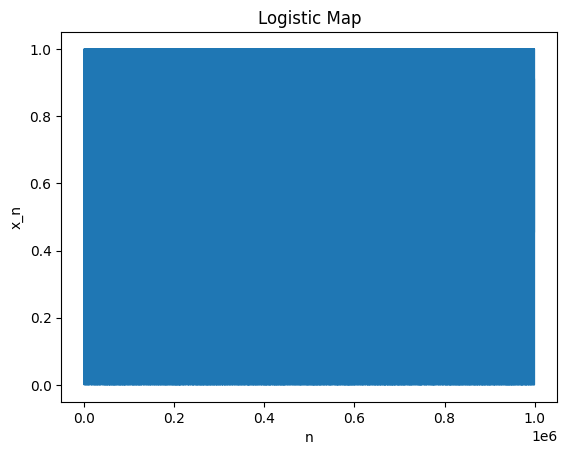

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

def x_n(n, R=4):
    x = 0.4  # Initial value
    result = [x]

    for _ in tqdm.tqdm(range(1, n)):
        x = R * x * (1 - x)
        result.append(x)

    return result

# Generate the values
ns = np.arange(0, 1000000)
xs = x_n(1000000)

plt.plot(ns, xs, linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x_n')
plt.title('Logistic Map')
plt.show()

In [27]:
np.min(xs)

7.225331444259213e-13

$x_n=4\,x_{n-1}\,(1-x_{n-1})$

let $x_n=\sin^2(\theta_n)\\$
$\implies \theta_n=\sin^{-1}(\sqrt{x_n})$
and $\boxed{\theta_{n+1}}=\sin^{-1}(\sqrt{x_{n+1}})=\sin^{-1}(\sqrt{4\,x_n\,(1-x_n)})=\sin^{-1}(2\,\sqrt{x_n}\,\sqrt{1-x_n})=\sin^{-1}(2\,\sin(\theta_n)\,\cos(\theta_n))=\sin^{-1}(\sin(2\,\theta_n))=\boxed{2\,\theta_n}$

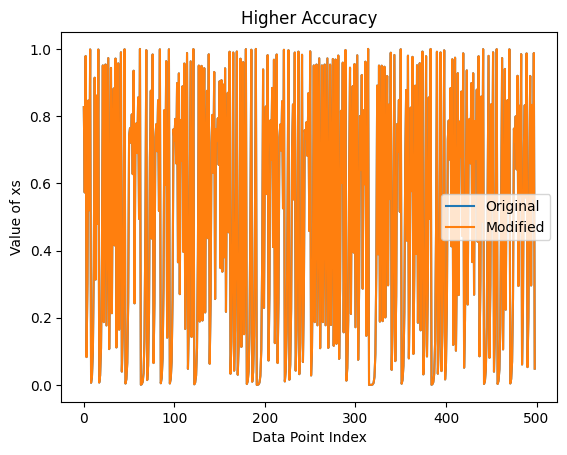

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set the desired precision (number of decimal places)
mpmath.mp.dps = 200  # Change this value to the desired precision

thetas = [mpmath.power(2, i) for i in range(1, 500)]
thetas_mod = [theta % (2 * mpmath.pi) for theta in thetas]
xs = [mpmath.power(mpmath.sin(theta), 2) for theta in thetas]
xs_mod = [mpmath.power(mpmath.sin(theta), 2) for theta in thetas_mod]

# Convert mpmath values to regular Python floats for plotting
xs = [float(x) for x in xs]
xs_mod = [float(x) for x in xs_mod]

plt.plot(xs, label='Original')
plt.plot(xs_mod, label='Modified')
plt.legend()
plt.xlabel('Data Point Index')
plt.ylabel('Value of xs')
plt.title('Higher Accuracy')
plt.show()
